# Problem Statement

To buid a machine learning system that can predict what is the medical insurance cost of a person

# Work Flow

1. Data Collection -> Insurance Cost data based on some parameters such as what are the health issues that person is having and other such kind of things
2. EDA -> to understand the insights of the data, what is this data all about and other such kind of things
3. Feature Engineering -> make the data compatiable to go into Machine Learning model
4. Data splitting -> training data & test data
5. Model Building -> Building the model and evaluating on training data
6. Model Evaluation -> Evaluating on Test data
7. Comparison -> Comparing different models to choose the best model for predicting the charges.
8. Building a predictive System

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We are having 3 categorical features -> Sex, Smoker, region

# EDA

In [5]:
# checking for missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Statistical measures of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Numerical Variables**

In [7]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [8]:
# Numerical variables are usually of 2 type
# 1.Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [9]:
discrete_feature

['children']

In [10]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

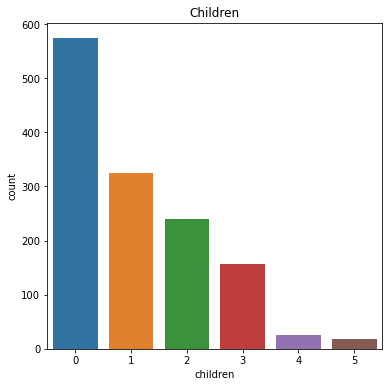

In [11]:
# distribution of children values

plt.figure(figsize=(6,6))
sb.countplot(x='children', data=data)
plt.title('Children')
plt.show()

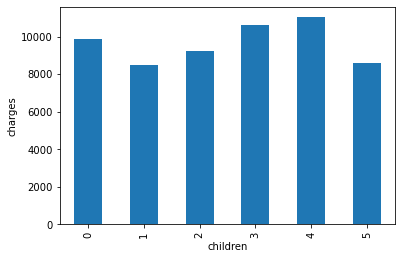

In [12]:
# Lets Find the realtionship between discrete feature and charges

for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['charges'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()

In [13]:
# 2.Continous variables

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: {}".format(len(continuous_feature)))

Continuous feature Count: 3


In [14]:
continuous_feature

['age', 'bmi', 'charges']

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


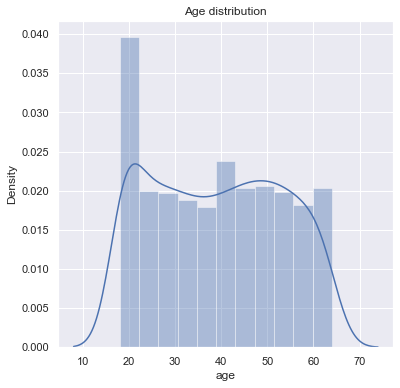

In [15]:
# distribution of Age values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.age)
plt.title('Age distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


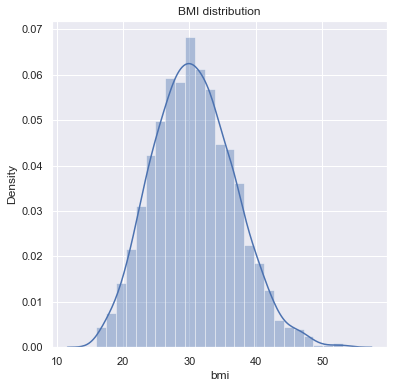

In [16]:
# distribution of bmi values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.bmi)
plt.title('BMI distribution')
plt.show()

Normal BMI range -> 18.5 to 24.9

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


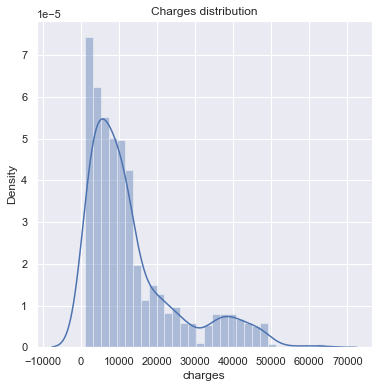

In [17]:
# distribution of charges values

plt.figure(figsize=(6,6))
sb.distplot(data.charges)
plt.title('Charges distribution')
plt.show()

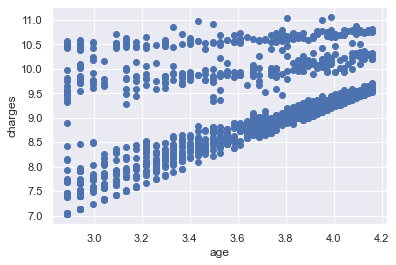

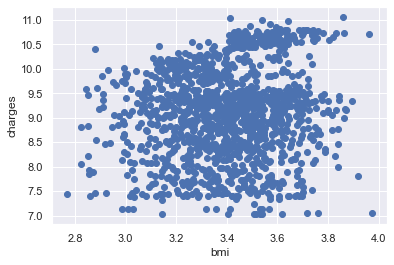

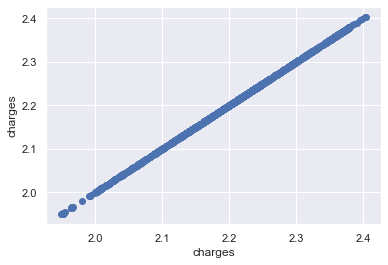

In [18]:
# We will be using logarithmic transformation for contiuous variables

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['charges'] = np.log(df['charges'])
        plt.scatter(df[feature],df['charges'])
        plt.xlabel(feature)
        plt.ylabel('charges')
        plt.show()


**Outliers**

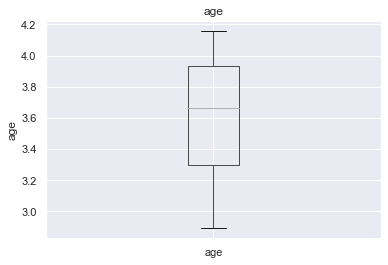

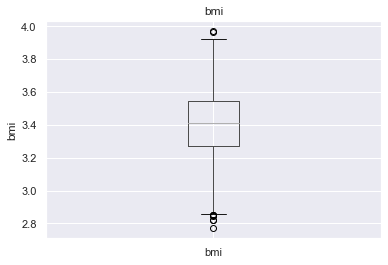

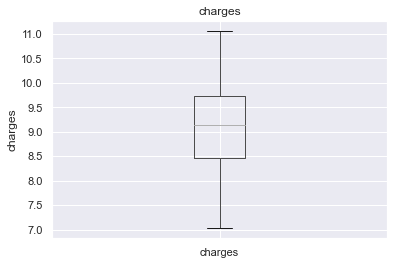

In [19]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [20]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['sex', 'smoker', 'region']

In [21]:
data[categorical_features].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [22]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

sex : 2
smoker : 2
region : 4


In [23]:
# distribution of Sex values

data.sex.value_counts().sort_index()

female    662
male      676
Name: sex, dtype: int64

In [24]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

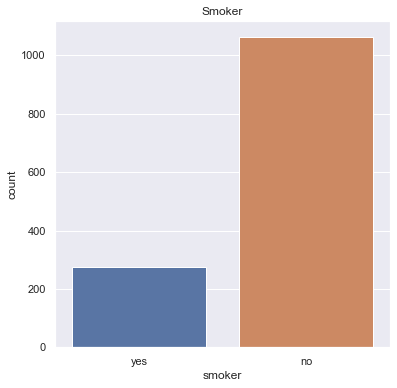

In [25]:
# distribution of smoker values

plt.figure(figsize=(6,6))
sb.countplot(x='smoker', data=data)
plt.title('Smoker')
plt.show()

In [26]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

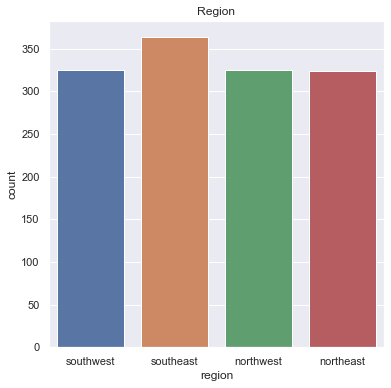

In [27]:
# distribution of region values

plt.figure(figsize=(6,6))
sb.countplot(x='region', data=data)
plt.title('Region')
plt.show()

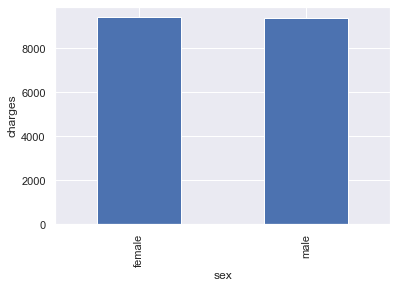

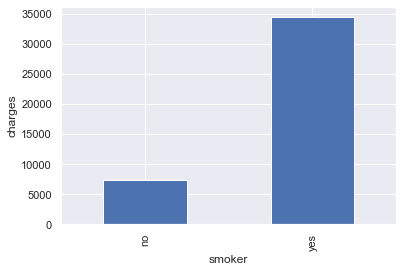

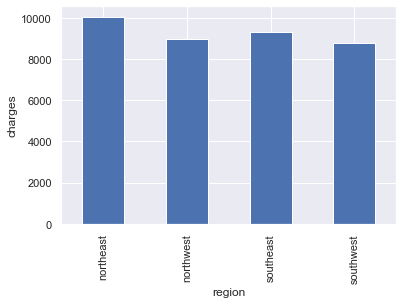

In [28]:
# relationship between categorical variable and dependent feature (charges)

for feature in categorical_features:
    df = data.copy()
    df.groupby(feature)['charges'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.show()

# Feature Engineering

In [29]:
# Encoding the Categorical Features

data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [30]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


**Feature Selection**

In [31]:
x = data.iloc[:,:-1]
y = data.charges

In [32]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

**Feature importance**

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor().fit(x,y)
model.feature_importances_

array([0.12864627, 0.00968158, 0.19369048, 0.02421432, 0.62059197,
       0.02317539])

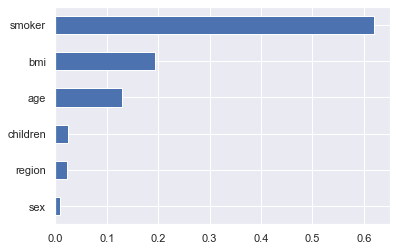

In [35]:
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.sort_values().plot(kind='barh')
plt.show()

**Correlation**

In [36]:
x.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000


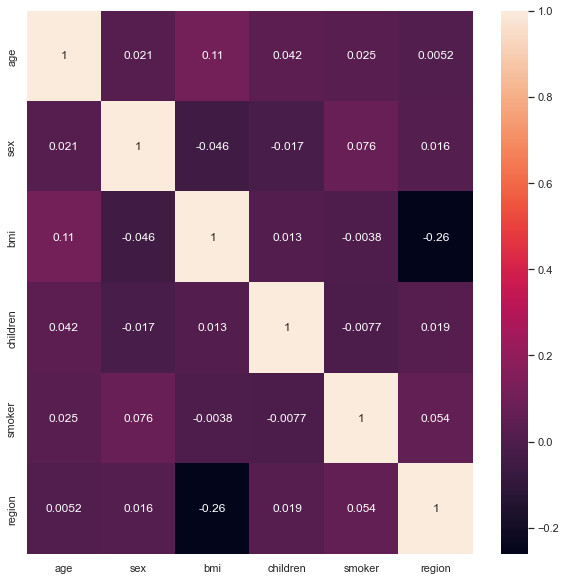

In [37]:
plt.figure(figsize=(10,10))
sb.heatmap(x.corr(), annot=True)
plt.show()

In [38]:
# lets remove the highly correlated features
threshold = 0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
correlation(x,threshold)

set()

As no multicollinearity exists, we will proceed further

# Data Splitting

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [41]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Linear Regression

**Model Building**

In [42]:
# loading the Linear Regression Model
model = LinearRegression().fit(x_train,y_train)

In [43]:
# Prediction on training data
train_data_pred = model.predict(x_train)

In [44]:
# R squared Value for trainig data
R_sq_train = metrics.r2_score(y_train, train_data_pred)
print(R_sq_train)

0.751505643411174


**Model Evaluation**

In [45]:
# Prediction on test data
test_data_pred = model.predict(x_test)

In [46]:
# R squared Value for test data
R_sq_test = metrics.r2_score(y_test, test_data_pred)
print(R_sq_test)

0.7447273869684077


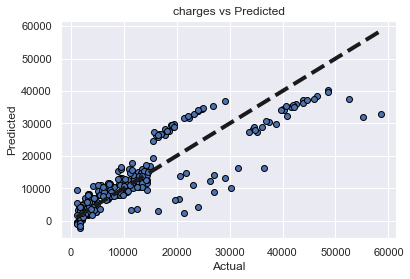

In [47]:
# Plot of predicted charges VS atual charges
fig, ax = plt.subplots()
ax.scatter(y_test, test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [48]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": test_data_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,1520.592422
1091,11286.53870,11570.592018
273,9617.66245,10082.438499
270,1719.43630,2246.217543
874,8891.13950,7881.283620
790,5662.22500,11081.502280
957,12609.88702,3538.247918
492,2196.47320,698.032240
1125,14254.60820,12223.485156
794,7209.49180,9611.932176


In [49]:
print("Coefficient of determination : ", metrics.r2_score(y_test, test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, test_data_pred))

Coefficient of determination :  0.7447273869684077
Mean Squared Error :  38337035.48643883
Root Mean Squared Error :  6191.690842285234
Mean Absolute Error :  4267.213826730733


**Interpretation**
- From the R-squared value, we observe that our Linear Regressionmodel is accurate to 74%.
- As the mean square error, Root mean sqaure error values are not close to 0, which indicates that the Linear Regression model is not good in predicting the charges.
- The Mean absolute error value is also not close to zero depecting that our Linear Regression model is not good in predicting.

# Support Vector Machine Model Regressor

**Model Building**

In [50]:
# Loading Support Vector Machine Model
from sklearn import svm

SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [51]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [52]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

-0.1466513853398994


**Model Evaluation**

In [53]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [54]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

-0.09975846691765988


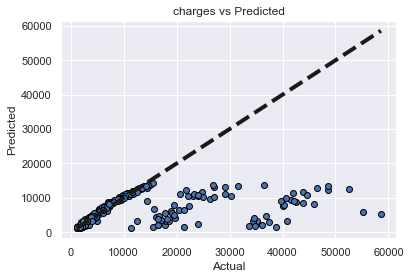

In [55]:
# Plot of predicted charges VS atual charges
fig, ax = plt.subplots()
ax.scatter(y_test, SVM_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [56]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": SVM_test_data_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,2679.264967
1091,11286.53870,11269.613893
273,9617.66245,10114.695467
270,1719.43630,1519.767094
874,8891.13950,9005.438544
790,5662.22500,6976.051354
957,12609.88702,3281.964037
492,2196.47320,1434.251297
1125,14254.60820,13423.840725
794,7209.49180,7618.772567


In [57]:
print("Coefficient of determination : ", metrics.r2_score(y_test, SVM_test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, SVM_test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, SVM_test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, SVM_test_data_pred))

Coefficient of determination :  -0.09975846691765988
Mean Squared Error :  165162564.3347648
Root Mean Squared Error :  12851.558828981208
Mean Absolute Error :  6401.642760595211


**Interpretation**
- From the R-squared value, we observe that our SVM Regressor model not suitable for this prediction purpose.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the SVM Regressor model is not good in predicting the charges.

# Ridge Regression

**Model Building**

In [58]:
# Loading Ridge regression Model
from sklearn.linear_model import Ridge

# loading the Model
Ridge_model = Ridge().fit(x_train,y_train)

In [59]:
# R squared Value for trainig data

Ridge_train_pred = Ridge_model.predict(x_train)
Ridge_R2_train = metrics.r2_score(y_train, Ridge_train_pred)
print(Ridge_R2_train)

0.7514846144151406


**Model Evaluation**

In [60]:
# R squared Value for test data

Ridge_test_pred = Ridge_model.predict(x_test)
Ridge_R2_test = metrics.r2_score(y_test, Ridge_test_pred)
print(Ridge_R2_test)

0.7448008334274916


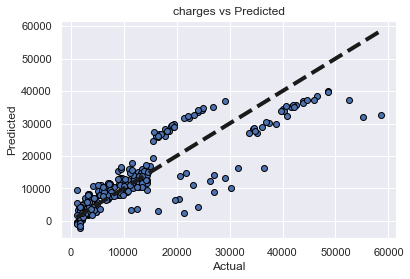

In [61]:
# Plot of predicted charges VS atual charges
fig, ax = plt.subplots()
ax.scatter(y_test, Ridge_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [62]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": Ridge_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,1553.546212
1091,11286.53870,11591.905873
273,9617.66245,10112.373179
270,1719.43630,2284.252912
874,8891.13950,7912.988562
790,5662.22500,11107.757662
957,12609.88702,3568.093615
492,2196.47320,723.648643
1125,14254.60820,12242.127800
794,7209.49180,9632.043256


In [63]:
print("Coefficient of determination : ", metrics.r2_score(y_test, Ridge_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, Ridge_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, Ridge_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, Ridge_test_pred))

Coefficient of determination :  0.7448008334274916
Mean Squared Error :  38326005.24126363
Root Mean Squared Error :  6190.80004856106
Mean Absolute Error :  4273.45404124713


**Interpretation**
- From the R-squared value, we observe that our Ridge Regressionmodel is accurate to 74%.
- As the mean square error, Root mean sqaure error values are not close to 0, which indicates that the Ridge Regression model is not good in predicting the charges.
- The Mean absolute error value is also not close to zero depecting that our Ridge Regression model is not good in predicting.

# Lasso Regression

**Model Building**

In [64]:
# Loading Lasso regression Model
from sklearn.linear_model import Lasso

# loading the Model
Lasso_model = Lasso().fit(x_train,y_train)

In [65]:
# R squared Value for trainig data

Lasso_train_pred = Lasso_model.predict(x_train)
Lasso_R2_train = metrics.r2_score(y_train, Lasso_train_pred)
print(Lasso_R2_train)

0.7515055550686265


**Model Evaluation**

In [66]:
# R squared Value for test data

Lasso_test_pred = Lasso_model.predict(x_test)
Lasso_R2_test = metrics.r2_score(y_test, Lasso_test_pred)
print(Lasso_R2_test)

0.7447245444913575


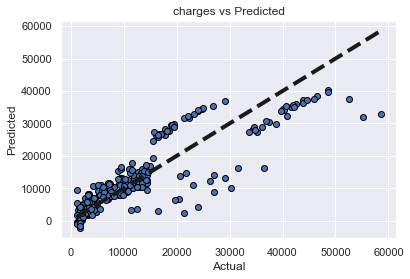

In [67]:
# Plot of predicted charges VS atual charges
fig, ax = plt.subplots()
ax.scatter(y_test, Lasso_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [68]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": Lasso_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,1525.076187
1091,11286.53870,11569.887545
273,9617.66245,10085.811565
270,1719.43630,2251.510852
874,8891.13950,7883.974857
790,5662.22500,11081.603179
957,12609.88702,3540.754534
492,2196.47320,697.941862
1125,14254.60820,12222.246898
794,7209.49180,9608.744481


In [69]:
print("Coefficient of determination : ", metrics.r2_score(y_test, Lasso_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, Lasso_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, Lasso_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, Lasso_test_pred))

Coefficient of determination :  0.7447245444913575
Mean Squared Error :  38337462.37180757
Root Mean Squared Error :  6191.725314628191
Mean Absolute Error :  4267.164610260893


**Interpretation**
- From the R-squared value, we observe that our Lasso Regressionmodel is accurate to 74%.
- As the mean square error, Root mean sqaure error values are not close to 0, which indicates that the Lasso Regression model is not good in predicting the charges.
- The Mean absolute error value is also not close to zero depecting that our Lasso Regression model is not good in predicting.

# KNN Regressor

**Model Building**

In [70]:
# Loading KNN Model
from sklearn.neighbors import KNeighborsRegressor

# loading the Model
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)

# R squared Value for trainig data
KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.3983864588194246


In [71]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(KNN_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


In [72]:
# optimum parameter values
search.best_params_

{'n_neighbors': 8}

In [73]:
KNN_model = KNeighborsRegressor(n_neighbors=8).fit(x_train,y_train)

In [74]:
# R squared Value for trainig data

KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.3083816328543838


**Model Evaluation**

In [75]:
# R squared Value for test data

KNN_test_pred = KNN_model.predict(x_test)
KNN_R2_test = metrics.r2_score(y_test, KNN_test_pred)
print(KNN_R2_test)

0.11165867023544762


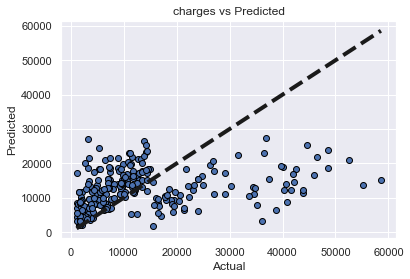

In [76]:
# Plot of predicted charges VS atual charges
fig, ax = plt.subplots()
ax.scatter(y_test, KNN_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("charges vs Predicted")
plt.show()

In [77]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": KNN_test_pred})
results.head(10)

,Actual,Predicted
17,2395.17155,4912.550318
1091,11286.53870,16678.055607
273,9617.66245,15294.524414
270,1719.43630,5539.777100
874,8891.13950,14171.920019
790,5662.22500,8927.185405
957,12609.88702,5286.742579
492,2196.47320,2077.709563
1125,14254.60820,23448.959284
794,7209.49180,15498.682881


In [78]:
print("Coefficient of determination : ", metrics.r2_score(y_test, KNN_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, KNN_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, KNN_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, KNN_test_pred))

Coefficient of determination :  0.11165867023544762
Mean Squared Error :  133411777.62394401
Root Mean Squared Error :  11550.40162175948
Mean Absolute Error :  8461.23308979431


**Interpretation**
- From the R-squared value, we observe that our KNN Regressor model not suitable for this prediction purpose.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the KNN Regressor model is not good in predicting the charges.

# Comaprison

Decreasing order of accuracy is depicted as:

- Ridge Regression - 0.7448
- Linear Regression - 0.7447
- Lasso Reression - 0.7447
- KNN Regressor - 0.1116
- SVM Regressor - -0.0997

The results are highly clear that all the models except SVM Regressor  & KNN Regressor are good in predicting the medical insurance costs. The model that can't be used for this cost prediction is SVM because of its small expansion. SVM can't have the ability to handle huge data. 

# Building a predective system

In [79]:
# input data -> (31, female=1, 25.74, 0, no=1, southeast=0)
# output ->  3756.6216


input_data = (31, 1, 25.74, 0, 1, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [80]:
prediction = model.predict(input_data_reshape)
print(prediction)

[3760.0805765]


In [81]:
# input data -> (43, male=0, 27.8, 0, yes=0, southwest=1)
# output ->  37829.7242


input_data = (43, 0, 27.8, 0, 0, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [82]:
prediction = model.predict(input_data_reshape)
print(prediction)

[31572.28054367]
